In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Originally, many of our questions had genre as a variable. However, when looking further into the data set, we noticed that there were two Children's Music genres, both with a different apostrophe placement. Additionally, many of our clustering models, specifically EM, took over 12 minutes to run. Adding in genre would increase the run time even more due to the large amount of genres. For these reasons, we decided to change the questions that used genre as a variable and use different variables instead.

#Shanzeh Q1

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pontheazahraii/SpotifyData/main/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

##*Question One*

### (Supervised Model) When predicting the danceability of a song, which predictor (popularity, duration_ms, energy, acousticness, instrumentalness) improves the R2 the most when compared to a model with all other variables except itself?

###Based on my prediction models it was hard to tell which predictor contributes the most to Danceability. After making seperate models for each predictor versus danceability I can tell that energy and popularity play the biggest role with danceability. Energy and Popularity are high near the value of 1 of danceability. 

###The r^2 scores were not the best and in the future i would want to clean the dataset more to have better predictor models. 

In [ ]:
#Supervised Model 
X1 = df[["popularity", "duration_ms", "energy", 
      "acousticness", "instrumentalness"]]

y1 = df["danceability"]

continuous1 = ["popularity", "duration_ms", "energy", "acousticness", "instrumentalness"]

In [ ]:
lr1 = LinearRegression()
z1 = StandardScaler()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)

X_train1 = z1.fit_transform(X_train1[continuous1])
X_test1 = z1.transform(X_test1[continuous1])

In [ ]:
lr1.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
y_pred_train1 = lr1.predict(X_train1)
y_pred_test1 = lr1.predict(X_test1)

In [ ]:
print("R2 Train: ", r2_score(y_train1, y_pred_train1))
print("R2 Test: ", r2_score(y_test1, y_pred_test1))

R2 Train:  0.22373076262776737
R2 Test:  0.22605576838945873


In [ ]:
true_vs_pred_train1 = pd.DataFrame({"predicted": y_pred_train1, 
                                    "true": y_train1})

true_vs_pred_test1 = pd.DataFrame({"predicted": y_pred_test1, 
                                   "true": y_test1})

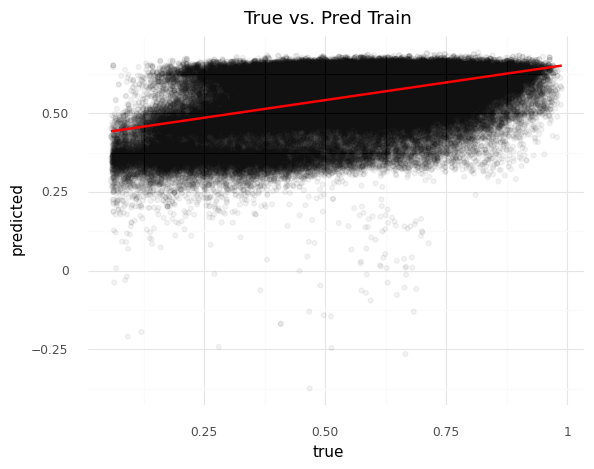

<ggplot: (8763209764093)>

In [ ]:
(ggplot(true_vs_pred_train1, aes(x = "true", y = "predicted")) + geom_point(alpha = 0.05) + theme_minimal() + 
 geom_smooth(method = "lm", color = "red") + labs(title = "True vs. Pred Train"))

This shows the true values versus the predicted train. The r^2 for this model is 0.22494519698897975 and can be seen with the red line on the graph.  

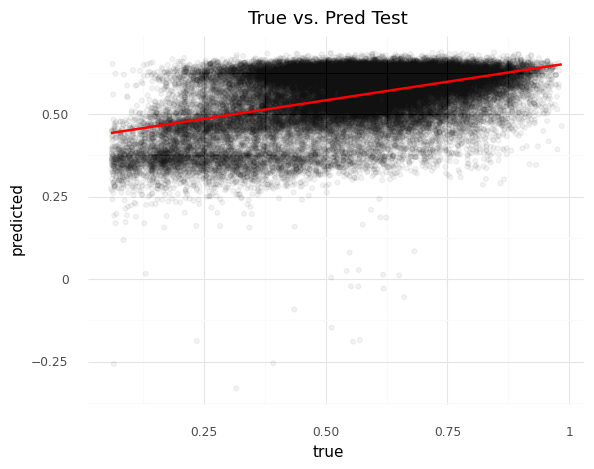

<ggplot: (8763180967005)>

In [ ]:
(ggplot(true_vs_pred_test1, aes(x = "true", y = "predicted")) + geom_point(alpha = 0.05) + theme_minimal() + 
 geom_smooth(method = "lm", color = "red") + labs(title = "True vs. Pred Test"))

This shows the true values versus the predicted test. The r^2 for this model is 0.22125071175618394 and can be seen with the red line on the graph.  

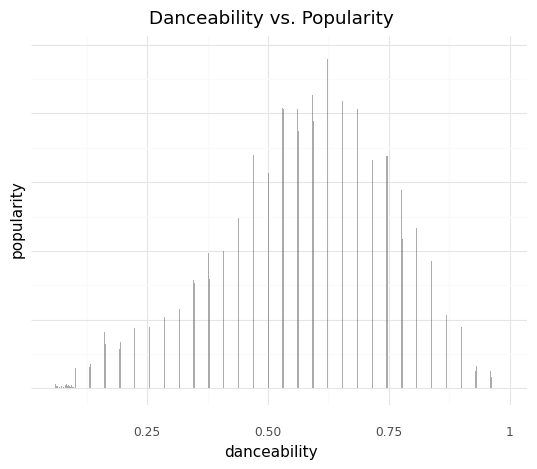

<ggplot: (8763173945901)>

In [ ]:
(ggplot(df, aes(x = "danceability", y = "popularity")) 
+ geom_bar(stat = "identity", alpha = 0.5) 
+ theme_minimal()
+ labs(title = "Danceability vs. Popularity")
+ theme( axis_text_y = element_blank()))

This plot shows the relationship between Danceability and Popularity. Based on the graph, when danceability is between 0.5 and 0.75 popularity is at its highest. 

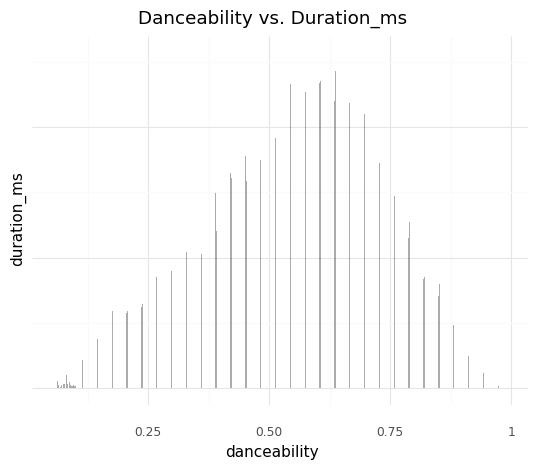

<ggplot: (8763202889209)>

In [ ]:
(ggplot(df, aes(x = "danceability", y = "duration_ms")) 
+ geom_bar(stat = "identity", alpha = 0.5) 
+ theme_minimal()
+ labs(title = "Danceability vs. Duration_ms")
+ theme( axis_text_y = element_blank()))

This plot shows the relationship between Danceability and Duration. Based on the graph, when danceability is between 0.60 and 0.70 duration is at its highest. 

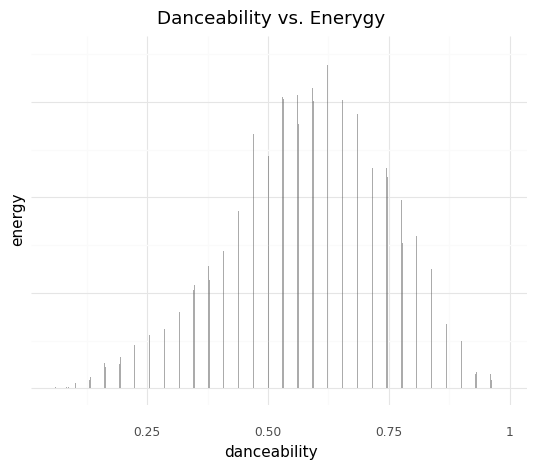

<ggplot: (8763181333137)>

In [ ]:
(ggplot(df, aes(x = "danceability", y = "energy")) 
+ geom_bar(stat = "identity", alpha = 0.5) 
+ theme_minimal()
+ labs(title = "Danceability vs. Enerygy")
+ theme( axis_text_y = element_blank()))

This plot shows the relationship between Danceability and Energy. Based on the graph, when danceability is between 0.65 and 0.75 energy is at its highest. 

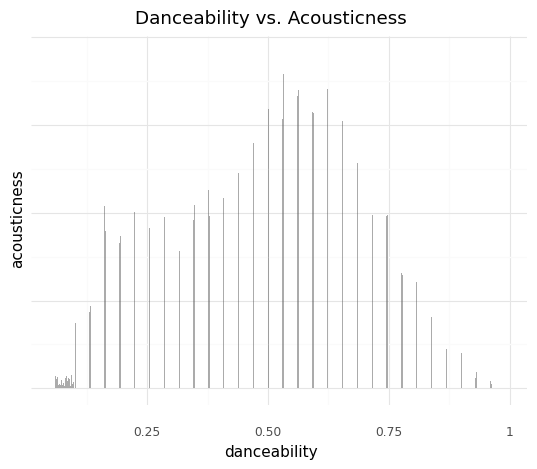

<ggplot: (8763174263625)>

In [ ]:
(ggplot(df, aes(x = "danceability", y = "acousticness")) 
+ geom_bar(stat = "identity", alpha = 0.5) 
+ theme_minimal()
+ labs(title = "Danceability vs. Acousticness")
+ theme( axis_text_y = element_blank()))

This plot shows the relationship between Danceability and Acousticness. Based on the graph, when danceability is between 0.45 and 0.55 acousticness is at its highest. 

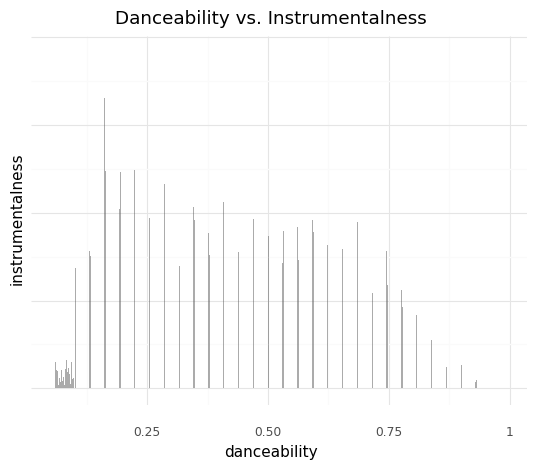

<ggplot: (8763202924857)>

In [ ]:
(ggplot(df, aes(x = "danceability", y = "instrumentalness")) 
+ geom_bar(stat = "identity", alpha = 0.5) 
+ theme_minimal()
+ labs(title = "Danceability vs. Instrumentalness")
+ theme( axis_text_y = element_blank()))

This plot shows the relationship between Danceability and Instrumentalness. Based on the graph, when danceability is between 0 and 0.25 instrumentalness is at its highest. 

#Shanzeh Q2

## *Question Two*

###(Supervised Model) When predicting the energy of a song, which predictor (artist_name, danceability, duration_ms, acousticness, instrumentalness) improves the R2 the most when compared to a model with all other variables except itself?

###Based on my prediction models it was hard to tell which predictor contributes the most to the Energy of the song. I saw that my question above had the same problem therefore I believe the problem stems from the amount of data points. After making seperate models for each predictor I learned alot about each predictors role with energy.

###Danceability = middle or higher has high energy
###Duration = no role to energy 
###Acousticness = as it increases energy is low 
###Instrumentalness = when its higher energy is closer to 0 but when its low its closer to 1 for energy.
###Popularity = when its in the middle energy is very populated near 1.

###The r^2 scores were not the best and in the future i would want to clean the dataset more to have better predictor models. 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pontheazahraii/SpotifyData/main/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
#Supervised Model 
X2 = df[["popularity", "duration_ms", "danceability", 
      "acousticness", "instrumentalness"]]

y2 = df["energy"]

continuous2 = ["popularity", "duration_ms", "danceability", "acousticness", "instrumentalness"]

In [ ]:
lr2 = LinearRegression()
z2 = StandardScaler()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

X_train2 = z2.fit_transform(X_train2[continuous2])
X_test2 = z2.transform(X_test2[continuous2])

In [ ]:
lr2.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
y_pred_train2 = lr2.predict(X_train2)
y_pred_test2 = lr2.predict(X_test2)

In [ ]:
print("R2 Train: ", r2_score(y_train2, y_pred_train2))
print("R2 Test: ", r2_score(y_test2, y_pred_test2))

R2 Train:  0.5545695460049072
R2 Test:  0.5531028585631657


In [ ]:
true_vs_pred_train2 = pd.DataFrame({"predicted": y_pred_train2, 
                                    "true": y_train2})

true_vs_pred_test2 = pd.DataFrame({"predicted": y_pred_test2, 
                                   "true": y_test2})

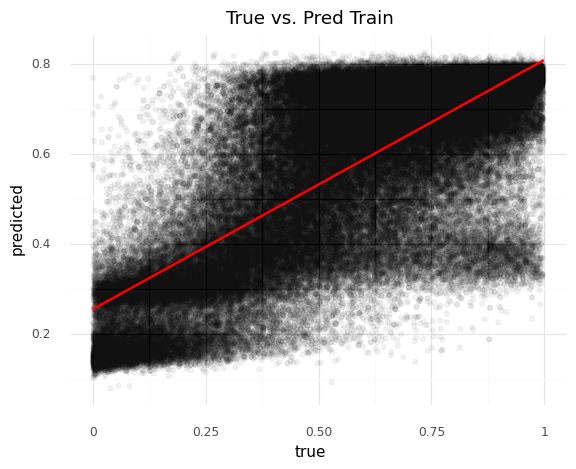

<ggplot: (8763195294549)>

In [ ]:
(ggplot(true_vs_pred_train2, aes(x = "true", y = "predicted")) + geom_point(alpha = 0.05) + theme_minimal() + 
 geom_smooth(method = "lm", color = "red") + labs(title = "True vs. Pred Train"))

This shows the true values versus the predicted train. The r^2 for this model is 0.5527003486304216 and can be seen with the red line on the graph.  

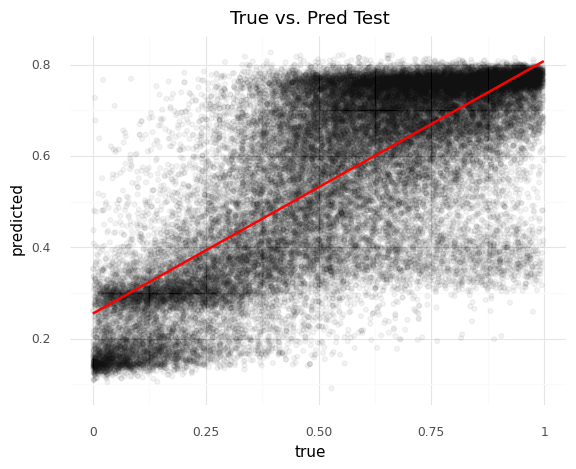

<ggplot: (8763203520677)>

In [ ]:
(ggplot(true_vs_pred_test2, aes(x = "true", y = "predicted")) + geom_point(alpha = 0.05) + theme_minimal() + 
 geom_smooth(method = "lm", color = "red") + labs(title = "True vs. Pred Test"))

This shows the true values versus the predicted test. The r^2 for this model is 0.5605594718720416 and can be seen with the red line on the graph.  

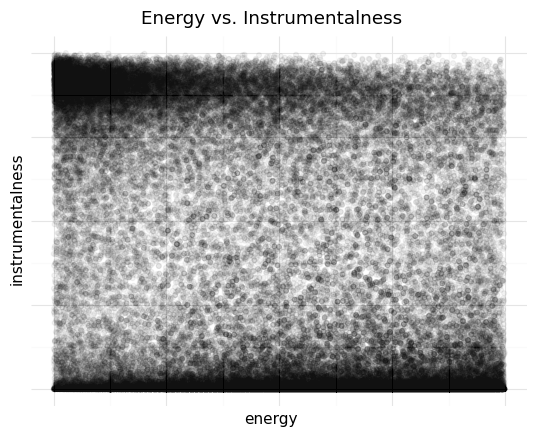

<ggplot: (8763173427217)>

In [ ]:
(ggplot(df, aes(x = "energy", y = "instrumentalness")) 
+ geom_point(stat = "identity", alpha = 0.05) 
+ theme_minimal()
+ labs(title = "Energy vs. Instrumentalness")
+ theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

This shows how low instrumentalism can boost higher energy.

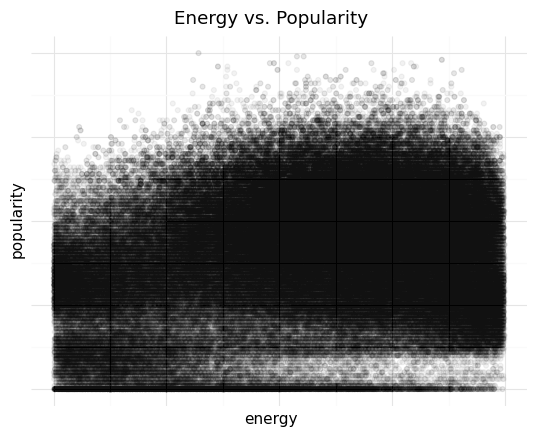

<ggplot: (8763173430457)>

In [ ]:
(ggplot(df, aes(x = "energy", y = "popularity")) 
+ geom_point(stat = "identity", alpha = 0.05) 
+ theme_minimal()
+ labs(title = "Energy vs. Popularity")
+ theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

When popularity ranges in the middle energy is high.

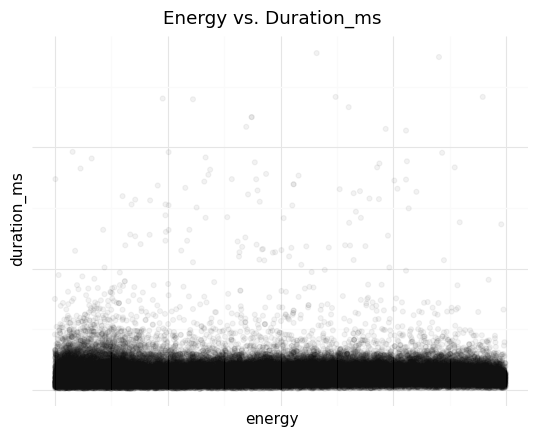

<ggplot: (8763168377937)>

In [ ]:
(ggplot(df, aes(x = "energy", y = "duration_ms")) 
+ geom_point(stat = "identity", alpha = 0.05) 
+ theme_minimal()
+ labs(title = "Energy vs. Duration_ms")
+ theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

Duration does not seem to play that big of a role and lower duration ranges throughout energy. 

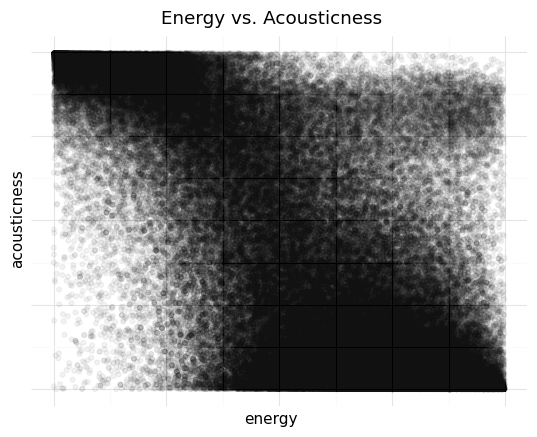

<ggplot: (8763195324885)>

In [ ]:
(ggplot(df, aes(x = "energy", y = "acousticness")) 
+ geom_point(stat = "identity", alpha = 0.05) 
+ theme_minimal()
+ labs(title = "Energy vs. Acousticness")
+ theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

High acousticness equals higher energy and lower acousticness creates lower energy. 

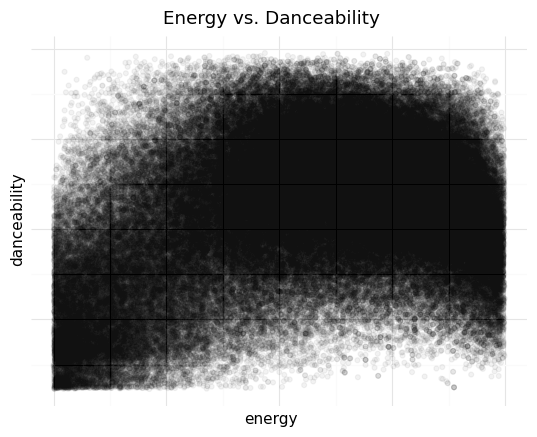

<ggplot: (8763203913569)>

In [ ]:
(ggplot(df, aes(x = "energy", y = "danceability")) 
+ geom_point(stat = "identity", alpha = 0.05) 
+ theme_minimal()
+ labs(title = "Energy vs. Danceability")
+ theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

When danceability ranges from middle to high energy also is also high.

#Ponthea Q1
##**(Dimensionality Reduction)** 
####When comparing a model using PCA on all continuous variables in the dataset and retaining enough PCs to keep 95% of the variance, to a model using all the continuous variables, how much of a difference is there in r2 score when predicting popularity of a song.

When using enough PC's to retain 95% of the variance in the data set, you can see the r2 score for the train set and the test set are very different. There seems to be some overfitting in the model when you only retain enough PC's for 95% of the variance as the training set r2 score is significatly higher than the testing set, but this is not a problem when all the variables are included in the model. The r2 of the test and training sets are approximately the same value when all the variables are included. The r2 score of the variables to retain 95% of the variance in the training set, is similar to the r2 score of both the r2 score for the testing and training set with all variables, but the testing set r2 score is significantly less meaning it is overfit. 



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pontheazahraii/SpotifyData/main/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
#Dimensionality Reduction
X3 = df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness"]]

y3 = df["popularity"]

In [ ]:
z3 = StandardScaler()

X3 = z3.fit_transform(X3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2)

X_train3 = z3.fit_transform(X_train3)
X_test3 = z3.transform(X_test3)

In [ ]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)

y_pred_train3 = lr3.predict(X_train3)
y_pred_test3 = lr3.predict(X_test3)

In [ ]:
pca = PCA()
pca.fit(X_train3)

PCA()

In [ ]:
pcaDF = pd.DataFrame({"expl_var": pca.explained_variance_ratio_,
                      "pc": range(1,6),
                      "cum_var": pca.explained_variance_ratio_.cumsum()})

pcaDF.head()

expl_var  pc   cum_var
0  0.453642   1  0.453642
1  0.207415   2  0.661057
2  0.157496   3  0.818553
3  0.128018   4  0.946571
4  0.053429   5  1.000000

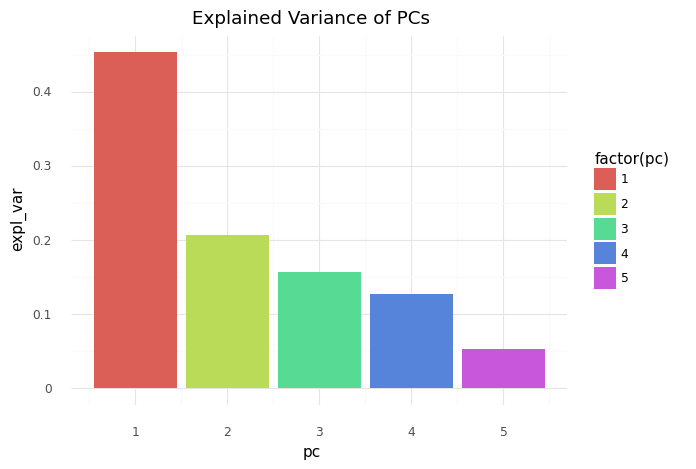

<ggplot: (8745879037221)>

In [ ]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var", fill = "factor(pc)")) 
+ geom_bar(stat = "identity") 
+ theme_minimal()
+ labs(title = "Explained Variance of PCs"))

This bar chart shows the explained variance of each PC. It can be seen that the first variable has the greatest percentage of variance with about 45% of the variance being explained by the first variable. 

In [ ]:
pcaDF = pcaDF.append(pd.DataFrame({"expl_var": [0],
                                   "pc": [0],
                                   "cum_var": [0]
}))

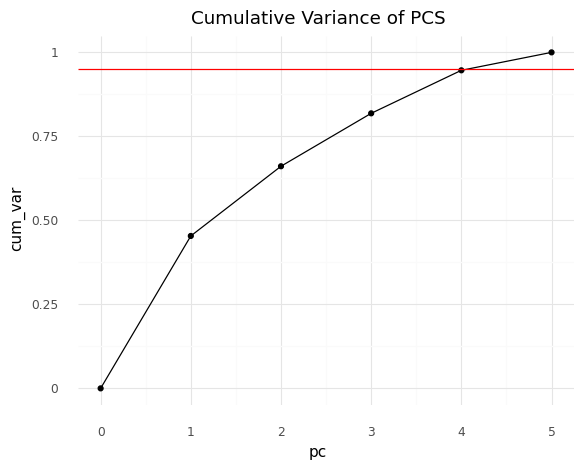

<ggplot: (8745875186317)>

In [ ]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) 
+ geom_line() 
+ geom_point() 
+ geom_hline(yintercept = 0.95, color = "red") 
+ theme_minimal()
+ labs(title = "Cumulative Variance of PCS"))

This ggplot represents the cumulative sum of the variance of the PC's. This graph shows that at 4 variables 95% of the variance is explained in the data.  

In [ ]:
pcomps4_train = pca.transform(X_train3)
pcomps4_train = pd.DataFrame(pcomps4_train[:,0:5])

pcomps4_test = pca.transform(X_test3)
pcomps4_test = pca.transform(pcomps4_test[:,0:5])

In [ ]:
lr4 = LinearRegression()
lr4.fit(pcomps4_train, y_train3)
y_pred_pcomps4_train = lr4.predict(pcomps4_train)
y_pred_pcomps4_test = lr4.predict(pcomps4_test)

print("Train all data: ", r2_score(y_train3, y_pred_train3))
print("Train 4 PCs:    ", r2_score(y_train3, y_pred_pcomps4_train) , "\n")

print("Test all data:  ", r2_score(y_test3, y_pred_test3))
print("Test 4 PCs:     ", r2_score(y_test3, y_pred_pcomps4_test))

Train all data:  0.16955328583638296
Train 4 PCs:     0.16955328583638296 

Test all data:   0.1735443006431664
Test 4 PCs:      0.08663349008074606


#Ponthea Q2
##**(Clustering)**
####When considering danceability, energy, acousticness, and instrumentalism, what clusters emerge and what characterizes those clusters.

It can be seen that with high energy then the danceability of the song is high in the cluster, and when the energy is low then the acoustiness is high. In my plots you can see if instrumentalness is a variable the cluster are awkwardly shaped, as one of the clusters will be grouped around the axis while the other cluster will be all the other data points.  

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pontheazahraii/SpotifyData/main/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
features = ['danceability', 'energy', 'acousticness' ,'instrumentalness']
X4 = df[features]

z4 = StandardScaler()

X4[features] = z4.fit_transform(X4)

In [ ]:
EM1 = GaussianMixture(n_components = 2)

EM1.fit(X4)

cluster1 = EM1.predict(X4)

silhouette_score(X4, cluster1)

0.2079359812775933

In [ ]:
X4["cluster"] = cluster1

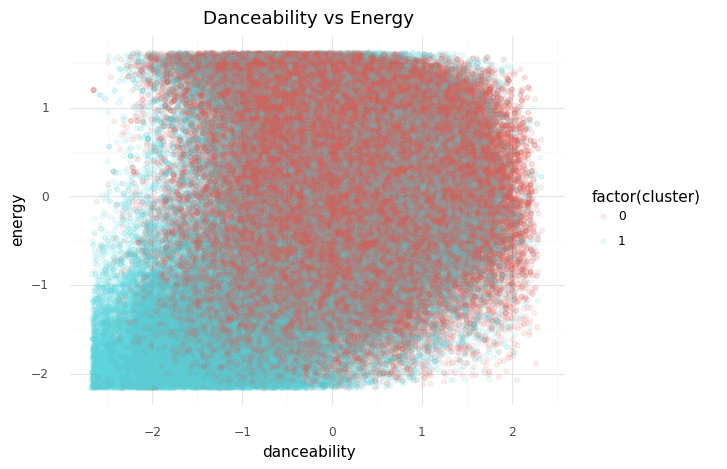

<ggplot: (8745885228429)>

In [ ]:
(ggplot(X4, aes(x = "danceability", y = "energy", color = "factor(cluster)")) 
+ geom_point(alpha = 0.1) 
+ theme_minimal() 
+ labs(title = "Danceability vs Energy"))

This is a ggplot showing the relationship between energy and danceability. It can be seen that low danceability and low energy are put into one cluster while high danceability and high energy are grouped in another cluster.

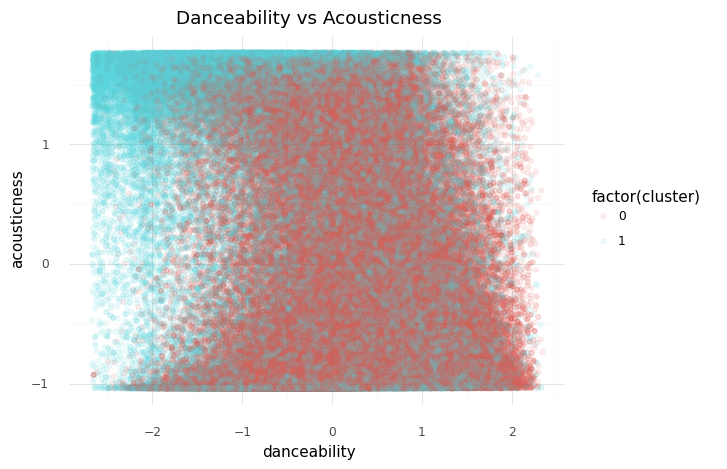

<ggplot: (8745878290565)>

In [ ]:
(ggplot(X4, aes(x = "danceability", y = "acousticness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Danceability vs Acousticness"))

This ggplot shows the relationship between acousticness and danceability. Here it can be seen that low danceability and high acousticness are clustered in one cluster while high danceability and low acoustiness are in another cluster. 

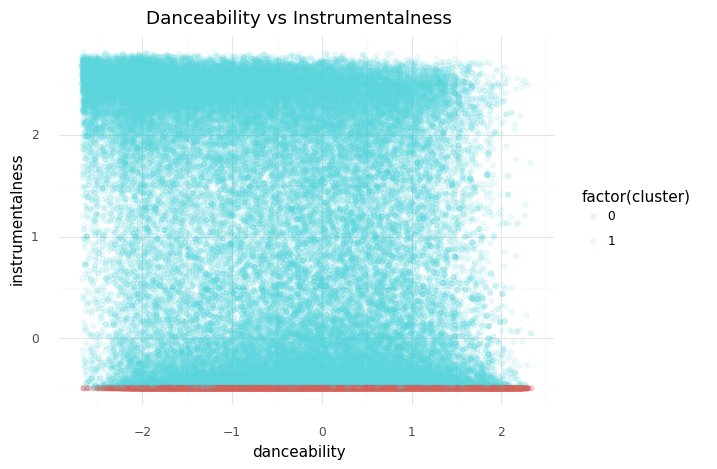

<ggplot: (8745866439553)>

In [ ]:
(ggplot(X4, aes(x = "danceability", y = "instrumentalness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Danceability vs Instrumentalness"))

This ggplot shows the relationship between instrumentalness and danceability. Cluster 0 shows that when instrumentalness is low it is grouped together in a cluster despite the danceability, but if the instrumentalness is not low, then everything is in a cluster. 

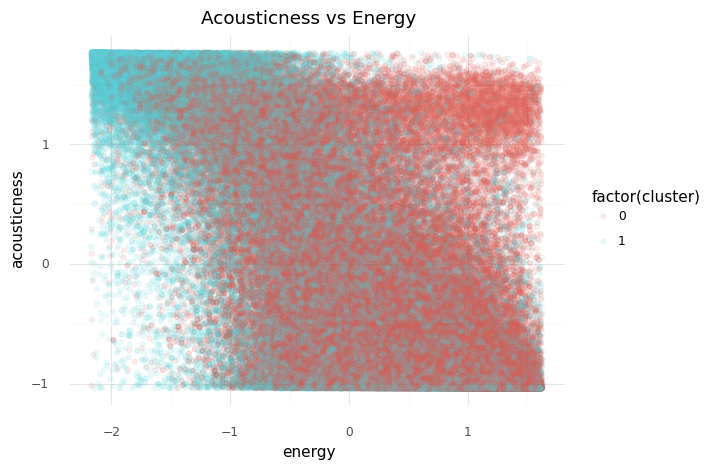

<ggplot: (8745852173317)>

In [ ]:
(ggplot(X4, aes(x = "energy", y = "acousticness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Acousticness vs Energy"))

This ggplot shows the relationship between acousticness and energy. Here it can be seen that low energy and high acousticness are clustered in one cluster while high energy and low acoustiness are in another cluster. 

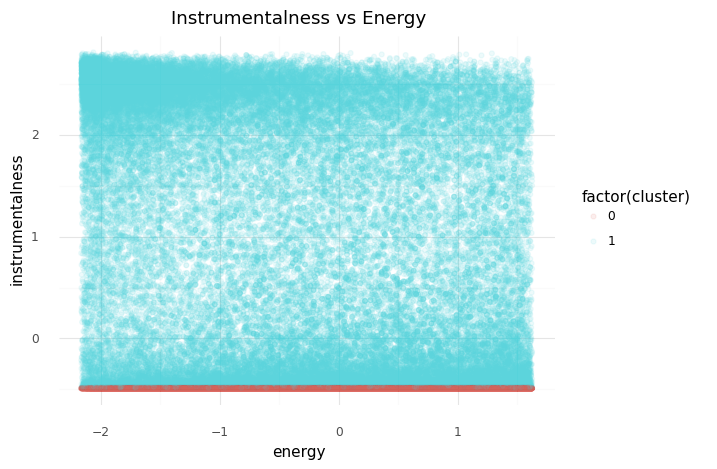

<ggplot: (8745866215673)>

In [ ]:
(ggplot(X4, aes(x = "energy", y = "instrumentalness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Instrumentalness vs Energy"))

This ggplot shows the relationship between instrumentalness and energy. Cluster 0 shows that when instrumentalness is low it is grouped together in a cluster despite the energy level, but if the instrumentalness is not low, then everything is in a cluster. 

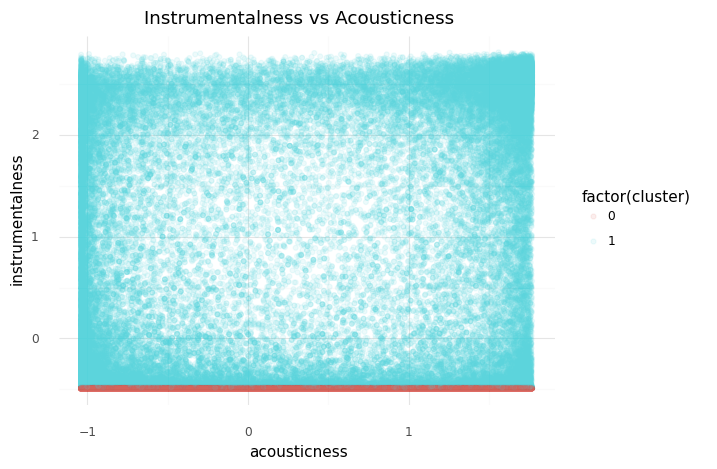

<ggplot: (8745854993581)>

In [ ]:
(ggplot(X4, aes(x = "acousticness", y = "instrumentalness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Instrumentalness vs Acousticness"))

This ggplot shows the relationship between instrumentalness and acoustiness. Cluster 0 shows that when instrumentalness is low it is grouped together in a cluster despite the acousticness level, but if the instrumentalness is not low, then everything is in a cluster. 

#Surina Q1

**CLUSTERING**

Does K-means or EM best cluster the data when using acousticness and danceability as features?

K-means and EM differ in their clustering as K-means assumes that clusters are spherical in shape while EM assumes that clusters are elliptical in shape. To determine which method clusters acousticness and danceability the best, we decided to look at the silhouette score, which measures the cohesion and separation of the clusters. The silhouette score for EM is 0.107 while the silhouette score for K-means is 0.407. From comparing the two silhoette scores, K-means is a better method for clustering the data. What was very interesting to see is the difference in clusters on the K-means and EM graphs. The clusters look very different between the two graphs. This is because each clustering method assumes the clusters are different shapes. The clusters on the K-means graph looks more spherical while the clusters on the EM graph looks more oval in shape. The reason why the K-means silhouette score is better is probably because the clusters are more spherical in shape. The 5 clusters split the Spotify songs by level of acousticness and danceability. There are clusters for low, medium, and high levels of danceability and low and high levels of acousticness for K-means. For EM, the clusters mainly split the songs into 5 levels of acousticness

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pontheazahraii/SpotifyData/main/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
features2 = ["acousticness", "danceability"]
X5 = df[features2]

z5 = StandardScaler()

X5[features2] = z5.fit_transform(X5)

In [ ]:
EM2 = GaussianMixture(n_components = 5)

EM2.fit(X5)

cluster2 = EM2.predict(X5)

silhouette_score(X5, cluster2)

0.10742019380205725

In [ ]:
X5["cluster"] = cluster2

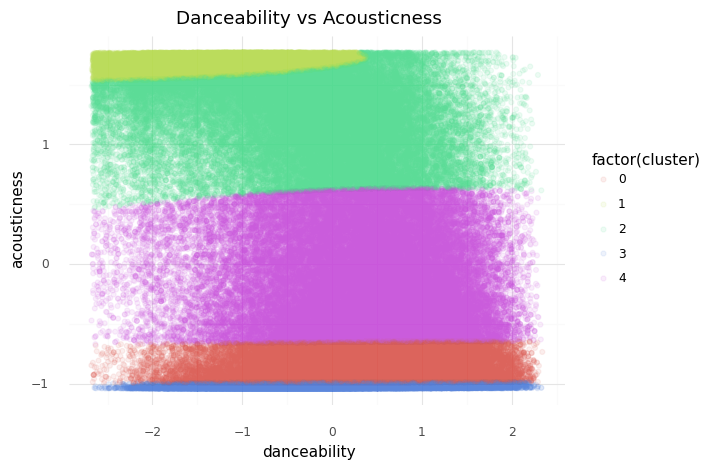

<ggplot: (8745853626269)>

In [ ]:
(ggplot(X5, aes(x = "danceability", y = "acousticness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Danceability vs Acousticness"))

This ggplot shows the clusters in danceability and acousticness when using EM as the clustering model. As explained earlier, the clusters are more eliptical in shape and the songs are split mainly by level of acousticness.

In [ ]:
features3 = ["acousticness", "danceability"]
X6 = df[features3]

z6 = StandardScaler()

X6[features3] = z6.fit_transform(X6)

In [ ]:
km = KMeans(n_clusters = 5)

km.fit(X6)

cluster3 = km.predict(X6)

silhouette_score(X6, cluster3)

0.40665883111115014

In [ ]:
X6["cluster"] = cluster3

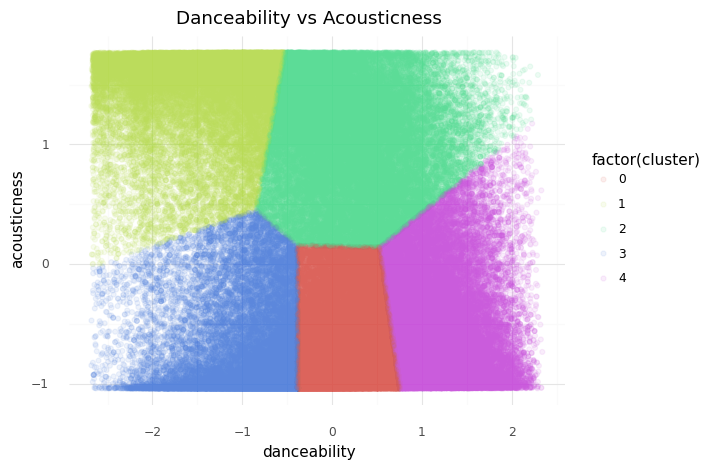

<ggplot: (8745838426013)>

In [ ]:
(ggplot(X6, aes(x = "danceability", y = "acousticness", color = "factor(cluster)")) + geom_point(alpha = 0.1) + theme_minimal() + labs(title = "Danceability vs Acousticness"))

This ggplot shows the clusters in danceability and acousticness using K-means as the clustering algorithm. The clusters are spherical in shape and each cluster either as low, medium, or high danceability and low or high acousticness.

#Surina Q2

**SUPERVISED LEARNING**

Use a train test split of 80% 20% to create a model that predicts the acousticness of a song using duration, energy, and instrumentalness as variables. What is the R^2 between the model's train set and test set. Is the model overfit?

Since acousticness is a continuous variable, we created a linear regression on the training data. We did not need any dumy variables since all predictor variables are also continuous. After z-score the variables and fitting the model on the training set, we had the model predict both the training and testing sets and compared the R^2 to see if the model was overfit. An overfit model occurs when it is too complex to the training data. The R^2 for training is 0.5285 and the R^2 for testing is 0.5289. The R^2 for testing data is actually slightly higher than the R^2 for training data, which means the model is not overfit at all. To improve the R^2, I would probably add more predictor variables to make the model more accurate

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pontheazahraii/SpotifyData/main/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
X7 = df[["duration_ms", "energy", "instrumentalness"]]

y7 = df["acousticness"]

In [ ]:
lr4 = LinearRegression()
z7 = StandardScaler()

X_train4, X_test4, y_train4, y_test4 = train_test_split(X7, y7, test_size = 0.2)

X_train4 = z7.fit_transform(X_train4)
X_test4 = z7.transform(X_test4)

In [ ]:
lr4.fit(X_train4, y_train4)

LinearRegression()

In [ ]:
y_pred_train4 = lr4.predict(X_train4)
y_pred_test4 = lr4.predict(X_test4)

In [ ]:
print("R2 Train: ", r2_score(y_train4, y_pred_train4))
print("R2 Test:  ", r2_score(y_test4, y_pred_test4))

R2 Train:  0.5285554647412307
R2 Test:   0.5289703698727172


In [ ]:
true_vs_pred_train4 = pd.DataFrame({"predicted": y_pred_train4, 
                                    "true": y_train4})

true_vs_pred_test4 = pd.DataFrame({"predicted": y_pred_test4, 
                                   "true": y_test4})

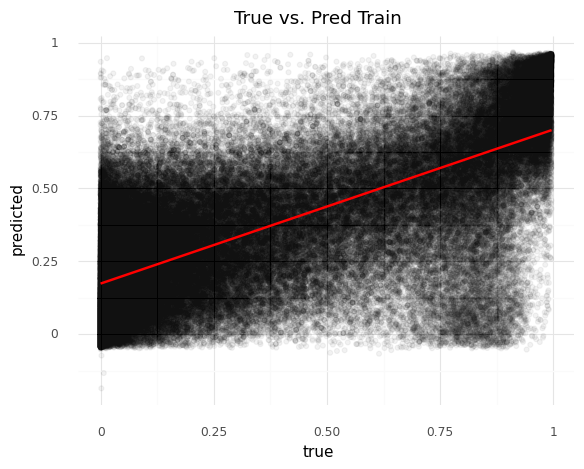

<ggplot: (8745855742113)>

In [ ]:
(ggplot(true_vs_pred_train4, aes(x = "true", y = "predicted")) + geom_point(alpha = 0.05) + theme_minimal() + 
 geom_smooth(method = "lm", color = "red") + labs(title = "True vs. Pred Train"))

From this graph, you can see that the model does fairly well in predicting the level of acousticness of a song. The data points are slightly more concentrated towards the 0 and 1, which means the model predicts acousticness closer to 0 and 1 compared to in the middle of the range. Although the data is pretty condensed towards the red line, there are many points that are scattered away from the center of the graph, which is probably why the R^2 is not higher.

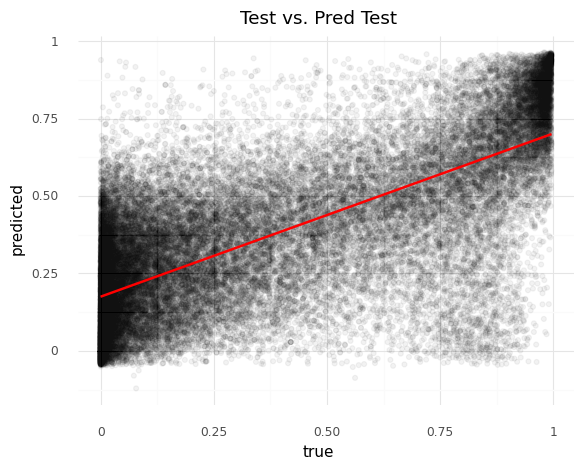

<ggplot: (8745855743217)>

In [ ]:
(ggplot(true_vs_pred_test4, aes(x = "true", y = "predicted")) + geom_point(alpha = 0.05) + theme_minimal() + 
 geom_smooth(method = "lm", color = "red") + labs(title = "Test vs. Pred Test"))

Similar to the graph for the training data, the model predicts values of 0 and 1 more than values in the middle of the range. However, the graph is much more dense closer to 0 and 1 acousticness compared to the training graph. Additionally, there are some data points scattered away from the red line while others are more condensed, which is why the R^2 is around 0.5 and not any higher. Adding more predictor variables will improve this.